In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Ordinary Least Squares Binary Logistic Regression

In [243]:
class logistic_regression_sgd(object):
    
    def __init__(self):
        self.w = None
        
    def preprocess(self,x,y=None):
        if len(x.shape) == 1:
            x = x.reshape(-1,1)
        x = np.concatenate([np.ones(x.shape[0]).reshape(-1,1),x],axis=1)
        if y is not None:
            y = y.reshape(-1,1)
        return x,y
    
    def sigmoid(self,z):
        return 1.0 / (1.0 + np.exp(-1.0*z))
    
    def get_gradient(self, w, x, y):
        y_estimate = self.sigmoid(x.dot(w).flatten())        
        error = (y.flatten() - y_estimate)        
        gradient = -(1.0/len(x)) * error.dot(x)
        return gradient.T
        
    def train(self,x,y):
        x,y = self.preprocess(x,y)
        self.w = np.random.normal(0,10,x.shape[1])
        
        alpha = 0.01
        tolerance = 10e-3
        max_epochs = 100000
        epochs = 0
        
        while True:
            gradient = self.get_gradient(self.w,x,y) 
            self.w -= (1.0/x.shape[0])*alpha*gradient
            epochs += 1
            
            #print self.brier_score(self.sigmoid(x.dot(self.w)),y)
            
            if np.sum(abs(gradient)) < 10e-15 or epochs >= max_epochs:
                print epochs
                break
         
    def predict(self,x):
        x,_ = self.preprocess(x)
        return self.sigmoid(x.dot(self.w))
    
    def brier_score(self,y_pred,y):
        return (1.0/y.shape[0])*np.sum((y_pred - y)**2)
    
    def get_params(self):
        return self.w

100000
100000


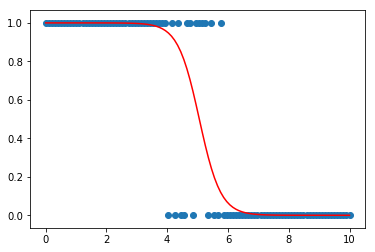

In [244]:
# deterministic test case
X = np.array([[1,2,3],[2,3,4],[3,4,5],[4,5,6]])
Y = np.array([0,0,1,1]).T

model = logistic_regression_sgd()
model.train(X,Y)
predictions = model.predict(X)
brier_score = model.brier_score(predictions,Y)
params = model.get_params()

# random variable test case
X = np.linspace(0,10,100).reshape(-1,1)
Y = np.concatenate([np.ones(50),np.zeros(50)])
np.random.shuffle( Y[40:60] )

model2 = logistic_regression_sgd()
model2.train(X,Y)
predictions2 = model2.predict(X)
brier_score = model2.brier_score(predictions2,Y)
params2 = model2.get_params()

plt.scatter(X,Y)
plt.plot(X,predictions2,c='r')
plt.show()

### Ordinary Least Squares Multinomial Linear Regression

In [2]:
n = 100
cov = [[5,0],[0,5]]

x1 = np.random.multivariate_normal(mean=[2,10],cov=cov,size=n)
y1 = np.zeros(n)
x2 = np.random.multivariate_normal(mean=[8,10],cov=cov,size=n)
y2 = np.ones(n)
x3 = np.random.multivariate_normal(mean=[6,3],cov=cov,size=n)
y3 = np.ones(n)*2

x = np.concatenate([x1,x2,x3])
y = np.concatenate([y1,y2,y3]).reshape(-1,1)

plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [34]:
class logistic_regression_sgd(object):
    def __init__(self):
        self.w = {}
        
    def preprocess(self,x,y=None):
        if len(x.shape) == 1:
            x = x.reshape(-1,1)
        x = np.insert(x, 0, 1, axis=1)
        if y is not None:
            y = y.reshape(-1,1)
        return x, y
    
    def sigmoid(self,z):
        return 1.0 / (1.0 + np.exp(-z))
    
    def get_gradient(self,w,x,y):
        y_pred = self.sigmoid(x.dot(w))
        errors = y.flatten() - y_pred.flatten()
        gradient = (-1.0/x.shape[0])*errors.dot(x)
        return gradient.T
    
    def train(self,x,y):
        x,y = self.preprocess(x,y)
        
        eta = 0.1
        n_iter = 300000
        m = x.shape[0]
        
        for i in np.unique(y):
            y_train = np.where(y == i,1,0)
            
            w_i = np.random.normal(0,10,x.shape[1]) 
            
            for epoch in range(n_iter):
                gradient = self.get_gradient(w_i,x,y_train)
                w_i -= (1.0/m)*eta*gradient
                
            self.w[int(i)] = w_i
                
        return None
    
    def predict(self,x,prob=False):
        x,_ = self.preprocess(x)
        predictions = []
        for i in self.w.keys():
            w_i = self.w[int(i)]
            y_pred = self.sigmoid(x.dot(w_i))
            predictions.append(y_pred)
        if prob == False:
            predictions = np.array(predictions).T.argmax(axis=1).reshape(-1,1)
        else:
            predictions = np.array(predictions).T 
            predictions = predictions / predictions.sum(axis=1).reshape(-1,1)
        return predictions
    
    def accuracy(self,y_pred,y):
        return 1.0 * y[y == y_pred].shape[0] / y.shape[0]
    
    def get_params(self):
        return self.w
        

In [41]:
model = logistic_regression_sgd()
model.train(x,y)
model.get_params()
predictions = model.predict(x)
accuracy = model.accuracy(predictions,y)
params = model.get_params()
print accuracy

0.883333333333
